In [1]:
###### FINAL #######
#This script pulls in Diabetes Patient datasets from UCI ML Repository, builds and tests several predictive models and subsequently makes predictions for risks/likelihood of unplanned admission for patients with poorly managed diabetes conditions. This is likely due to various different reasons including non-compliance with medication, loss to follow-up on outpatient or GP appointments etc. The objective is to identify and predict such patient cohorts at an earlier stage, to permit clinicians to intervene and optimise the health of such identified patient cohorts. This will also reduce the likelihood of an avoidable hospital presentation/admission for these patients. 
# Author = "Dr Adaeze Nwobodo" email "AdaezeNwobodo@gmail.com"

<img src="ExploratoryDataAnalysis1.png" style = "width:1000px;height:350px"/>

In [2]:
# DEFINE HELPER FUNCTIONS 

In [3]:
# 1
load_file <- function(filename) {
    #loads text into dataframe
    return (read.table(filename, header = FALSE, sep = "", stringsAsFactors = FALSE, col.names = c("Date", "Time", "Code", "Value")))
}

print(load_file)

function(filename) {
    #loads text into dataframe
    return (read.table(filename, header = FALSE, sep = "", stringsAsFactors = FALSE, col.names = c("Date", "Time", "Code", "Value")))
}


In [4]:
# 2
clean_data_nofullduplicates <- function(data_frame) {
    #removes rows that contain full duplicates. Keep all non-duplicates
    return(distinct(data_frame, keep_all = TRUE))
}

print(clean_data_nofullduplicates)

function(data_frame) {
    #removes rows that contain full duplicates. Keep all non-duplicates
    return(distinct(data_frame, keep_all = TRUE))
}


In [5]:
# 3
clean_datanopartialduplicates <- function(data_frame) {
    #removes partial duplicates
    return(data_frame %>%
          count(Date) %>%
          filter(n > 1))
}

print(clean_datanopartialduplicates)

function(data_frame) {
    #removes partial duplicates
    return(data_frame %>%
          count(Date) %>%
          filter(n > 1))
}


In [6]:
# 4 
get_levels <- function(data_frame) {
    #checks for levels within dataset
    return(levels(dataframe))
}

print(get_levels)

function(data_frame) {
    #checks for levels within dataset
    return(levels(dataframe))
}


In [7]:
# 5
first_quartile <- function(data_frame) {
    return(quantile(data_frame, 0.25))
}

print(first_quartile)

function(data_frame) {
    return(quantile(data_frame, 0.25))
}


In [8]:
# 6
third_quartile <- function(data_frame) {
    return(quantile(data_frame, 0.75))
}

print(third_quartile)

function(data_frame) {
    return(quantile(data_frame, 0.75))
}


In [9]:
# 7
get_wday_month <- function(data_frame) {
    #obtain separate weekday and month datasets from "Date" column for use as independent variables 
    return(data_frame %>%
          mutate(wday = wday(Date, label = TRUE), month = month(Date, label = TRUE)))
}

print(get_wday_month)

function(data_frame) {
    #obtain separate weekday and month datasets from "Date" column for use as independent variables 
    return(data_frame %>%
          mutate(wday = wday(Date, label = TRUE), month = month(Date, label = TRUE)))
}


In [10]:
# 8
calculate_test_train_split <- function(data_frame) {
    #Split the datasets into training(0.75) & test(0.25) set inputs for models
    return (N <- nrow(data_frame) %>%
           round(N * 0.75) %>%
           gp <- runif(N)) %>%
           train_df <- data_frame[gp < 0.75, ]
           test_df <- data_frame[gp >= 0.75, ]

}

print(calculate_test_train_split)

function(data_frame) {
    #Split the datasets into training(0.75) & test(0.25) set inputs for models
    return (N <- nrow(data_frame) %>%
           round(N * 0.75) %>%
           gp <- runif(N)) %>%
           train_df <- data_frame[gp < 0.75, ]
           test_df <- data_frame[gp >= 0.75, ]

}


In [11]:
# IMPORT LIBRARIES

In [12]:
#Import Libraries
library(dplyr)
library(ggplot2)
library(tidyr)
install.packages("caret"); library(caret)
library(lubridate)
library(purrr)
library(mgcv)
library(rpart)
install.packages("sigr"); library(sigr)
library(tidyverse)
library(tidyselect)
library(tidymodels)
library(utils)
library(base)
library(broom)
library(cluster)
library(ellipsis)
library(graphics)
library(grDevices)
library(highr)
library(lattice)
library(methods)
library(nlme)
library(readr)
library(readxl)
library(stats)
library(stringr)
install.packages("ranger"); library(ranger)
library(tibble)
install.packages("xgboost"); library(xgboost)
library(randomForest)
library(magrittr)
install.packages("Metrics"); library(Metrics)
install.packages("assertive"); library(assertive)
library(lubridate)
install.packages("xts"); library(xts)
install.packages("hms"); library(hms)




Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: lattice

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date


Attaching package: 'purrr'

The following object is masked from 'package:caret':

    lift

Loading required package: nlme

Attaching package: 'nlme'

The following object is masked from 'package:dplyr':

    collapse

This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  3.1.3     v stringr 1.4.0
v readr   1.3.1     v

In [13]:
install.packages("vtreat"); library(vtreat)
install.packages("chron"); library(chron)
install.packages("data.table"); library(data.table)
install.packages("binr"); library(binr)
install.packages("psych"); library(psych)
install.packages("ggfortify"); library(ggfortify)
install.packages("tibble"); library(tibble)
library(mlbench)
install.packages("tidymodels"); library(tidymodels)
library(rpart) 
library(parsnip)
install.packages("wrapr"); library(wrapr)
library(brotools)
install.packages("rsample"); library(rsample)
install.packages("e1071"); library(e1071)
install.packages("elasticnet"); library(elasticnet)
install.packages("glmnet"); library(glmnet)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: wrapr

Attaching package: 'wrapr'

The following object is masked from 'package:tibble':

    view

The following objects are masked from 'package:tidyr':

    pack, unpack

The following object is masked from 'package:dplyr':

    coalesce


Attaching package: 'vtreat'

The following object is masked from 'package:recipes':

    prepare

The following object is masked from 'package:parsnip':

    fit

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: 'chron'

The following objects are masked from 'package:lubridate':

    days, hours, minutes, seconds, years

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: 'data.table'

The following object is masked from 'package:wrapr':

    :=

The following objects are masked from 'package:xts':

    first, last

The following object is masked from 

ERROR: Error in library(brotools): there is no package called 'brotools'


In [85]:
install.packages("lsr"); library(lsr)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [123]:
install.packages("outliers"); library(outliers)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: 'outliers'

The following object is masked from 'package:psych':

    outlier

The following object is masked from 'package:randomForest':

    outlier



In [14]:
# LOADING FILES
D1 <- load_file("data-01")
D1$pid <- c("D1")
head(D1)

Date,Time,Code,Value,pid
04-21-1991,9:09,58,100,D1
04-21-1991,9:09,33,9,D1
04-21-1991,9:09,34,13,D1
04-21-1991,17:08,62,119,D1
04-21-1991,17:08,33,7,D1
04-21-1991,22:51,48,123,D1


In [15]:
D2 <- load_file("data-02")
D2$pid <- c("D2")
head(D2)

Date,Time,Code,Value,pid
10-10-1989,08:00,58,149,D2
10-10-1989,08:00,33,010,D2
10-10-1989,12:00,60,116,D2
10-10-1989,12:00,33,004,D2
10-10-1989,18:00,62,304,D2
10-10-1989,18:00,33,010,D2


In [16]:
D3 <- load_file("data-03")
D3$pid <- c("D3")
head(D3)

Date,Time,Code,Value,pid
07-21-1990,06:43,58,202,D3
07-21-1990,07:03,33,4,D3
07-21-1990,07:03,35,9,D3
07-21-1990,08:56,56,115,D3
07-21-1990,10:57,60,134,D3
07-21-1990,16:14,62,100,D3


In [17]:
D4 <- load_file("data-04")
D4$pid <- c("D4")

In [18]:
D5 <- load_file("data-05")
D5$pid <- c("D5")

In [19]:
D6 <- load_file("data-06")
D6$pid <- c("D6")

In [20]:
D7 <- load_file("data-07")
D7$pid <- c("D7")

In [21]:
D8 <- load_file("data-08")
D8$pid <- c("D8")

In [22]:
D9 <- load_file("data-09")
D9$pid <- c("D9")

In [23]:
D10 <- load_file("data-10")
D10$pid <- c("D10")

In [24]:
#CLEANING DATA - datasets from patient 1 alone used for further exploration 

In [25]:
glimpse(D1)

Rows: 943
Columns: 5
$ Date  <chr> "04-21-1991", "04-21-1991", "04-21-1991", "04-21-1991", "04-21-1~
$ Time  <chr> "9:09", "9:09", "9:09", "17:08", "17:08", "22:51", "7:35", "7:35~
$ Code  <int> 58, 33, 34, 62, 33, 48, 58, 33, 34, 33, 62, 33, 58, 33, 34, 62, ~
$ Value <int> 100, 9, 13, 119, 7, 123, 216, 10, 13, 2, 211, 7, 257, 11, 13, 12~
$ pid   <chr> "D1", "D1", "D1", "D1", "D1", "D1", "D1", "D1", "D1", "D1", "D1"~


In [27]:
#Converting "Date" column from character to "date" format

#Parse date - "mdy" format of datasets to convert to ISO8601 standard "ymd" format
D1_dates <- D1 %>%
    mutate(date1 = mdy(Date))

head(D1_dates)

Date,Time,Code,Value,pid,date1
04-21-1991,9:09,58,100,D1,1991-04-21
04-21-1991,9:09,33,9,D1,1991-04-21
04-21-1991,9:09,34,13,D1,1991-04-21
04-21-1991,17:08,62,119,D1,1991-04-21
04-21-1991,17:08,33,7,D1,1991-04-21
04-21-1991,22:51,48,123,D1,1991-04-21


In [28]:
glimpse(D1_dates)
class(D1_dates)
min(D1_dates$date1)
max(D1_dates$date1)

Rows: 943
Columns: 6
$ Date  <chr> "04-21-1991", "04-21-1991", "04-21-1991", "04-21-1991", "04-21-1~
$ Time  <chr> "9:09", "9:09", "9:09", "17:08", "17:08", "22:51", "7:35", "7:35~
$ Code  <int> 58, 33, 34, 62, 33, 48, 58, 33, 34, 33, 62, 33, 58, 33, 34, 62, ~
$ Value <int> 100, 9, 13, 119, 7, 123, 216, 10, 13, 2, 211, 7, 257, 11, 13, 12~
$ pid   <chr> "D1", "D1", "D1", "D1", "D1", "D1", "D1", "D1", "D1", "D1", "D1"~
$ date1 <date> 1991-04-21, 1991-04-21, 1991-04-21, 1991-04-21, 1991-04-21, 199~


[1] "data.frame"

[1] "1991-04-21"

[1] "1991-09-03"

In [29]:
#Conversion of Time column from character to datetime format
D1_dates$datetime = paste(D1_dates$Date, D1_dates$Time)
D1_dates$datetime = mdy_hm(D1_dates$datetime)
head(D1_dates)
glimpse(D1_dates)

Date,Time,Code,Value,pid,date1,datetime
04-21-1991,9:09,58,100,D1,1991-04-21,1991-04-21 09:09:00
04-21-1991,9:09,33,9,D1,1991-04-21,1991-04-21 09:09:00
04-21-1991,9:09,34,13,D1,1991-04-21,1991-04-21 09:09:00
04-21-1991,17:08,62,119,D1,1991-04-21,1991-04-21 17:08:00
04-21-1991,17:08,33,7,D1,1991-04-21,1991-04-21 17:08:00
04-21-1991,22:51,48,123,D1,1991-04-21,1991-04-21 22:51:00


Rows: 943
Columns: 7
$ Date     <chr> "04-21-1991", "04-21-1991", "04-21-1991", "04-21-1991", "04-2~
$ Time     <chr> "9:09", "9:09", "9:09", "17:08", "17:08", "22:51", "7:35", "7~
$ Code     <int> 58, 33, 34, 62, 33, 48, 58, 33, 34, 33, 62, 33, 58, 33, 34, 6~
$ Value    <int> 100, 9, 13, 119, 7, 123, 216, 10, 13, 2, 211, 7, 257, 11, 13,~
$ pid      <chr> "D1", "D1", "D1", "D1", "D1", "D1", "D1", "D1", "D1", "D1", "~
$ date1    <date> 1991-04-21, 1991-04-21, 1991-04-21, 1991-04-21, 1991-04-21, ~
$ datetime <dttm> 1991-04-21 09:09:00, 1991-04-21 09:09:00, 1991-04-21 09:09:0~


In [30]:
#Removing redundant character columns ("Date", "Time")

D2_dates <- D1_dates %>%
    select(-Date, -Time)

head(D2_dates)
nrow(D2_dates)

Code,Value,pid,date1,datetime
58,100,D1,1991-04-21,1991-04-21 09:09:00
33,9,D1,1991-04-21,1991-04-21 09:09:00
34,13,D1,1991-04-21,1991-04-21 09:09:00
62,119,D1,1991-04-21,1991-04-21 17:08:00
33,7,D1,1991-04-21,1991-04-21 17:08:00
48,123,D1,1991-04-21,1991-04-21 22:51:00


[1] 943

In [31]:
#EXPLORATORY DATA ANALYSIS / DATA VISUALISATION 

In [35]:
#Filtered out datasets for Insulin types

target <- c(33, 34, 35)

Insulin_data <- D2_dates %>%
    filter(Code %in% target) %>%
    rename(Insulin_Code = Code, Insulin_dose = Value)

head(Insulin_data)
nrow(Insulin_data)

Insulin_Code,Insulin_dose,pid,date1,datetime
33,9,D1,1991-04-21,1991-04-21 09:09:00
34,13,D1,1991-04-21,1991-04-21 09:09:00
33,7,D1,1991-04-21,1991-04-21 17:08:00
33,10,D1,1991-04-22,1991-04-22 07:35:00
34,13,D1,1991-04-22,1991-04-22 07:35:00
33,2,D1,1991-04-22,1991-04-22 13:40:00


[1] 523

In [36]:
#Further exploration showing Regular Insulin taken throughout the day, from 07:20hrs to 23:30hrs (summary below)
Reg_Insulin <- Insulin_data %>%
    filter(Insulin_Code == 33)

head(Reg_Insulin)
nrow(Reg_Insulin)

[1] "1991-04-21 09:09:00 UTC"

[1] "1991-09-03 07:20:00 UTC"

Insulin_Code,Insulin_dose,pid,date1,datetime
33,9,D1,1991-04-21,1991-04-21 09:09:00
33,7,D1,1991-04-21,1991-04-21 17:08:00
33,10,D1,1991-04-22,1991-04-22 07:35:00
33,2,D1,1991-04-22,1991-04-22 13:40:00
33,7,D1,1991-04-22,1991-04-22 16:56:00
33,11,D1,1991-04-23,1991-04-23 07:25:00


[1] 384

In [37]:
#Further exploration of Intermediate acting insulin - datetimes show doses taken only in the mornings between
#05:52hrs and 10:00hrs
Inter_Insulin <- Insulin_data %>%
    filter(Insulin_Code == 34)

head(Inter_Insulin)
nrow(Inter_Insulin)

Insulin_Code,Insulin_dose,pid,date1,datetime
34,13,D1,1991-04-21,1991-04-21 09:09:00
34,13,D1,1991-04-22,1991-04-22 07:35:00
34,13,D1,1991-04-23,1991-04-23 07:25:00
34,14,D1,1991-04-24,1991-04-24 07:52:00
34,14,D1,1991-04-25,1991-04-25 07:29:00
34,14,D1,1991-04-26,1991-04-26 05:52:00


[1] 139

In [38]:
#Further exploration of Long_Acting Insulin - nil recorded datasets for Long-Acting Insulin

LongAct_Insulin <- Insulin_data %>%
    filter(Insulin_Code == 35)

head(LongAct_Insulin)
nrow(LongAct_Insulin)

Insulin_Code,Insulin_dose,pid,date1,datetime


[1] 0

In [39]:
#Similar exploration of datasets for remaining features reveal recorded data for 

# 48 - Unspecified Glucose measurement
# 58 - Pre-Breakfast Glucose measurement
# 60 - Pre-Lunch Glucose measurement
# 62 - Pre-Supper Glucose measurement

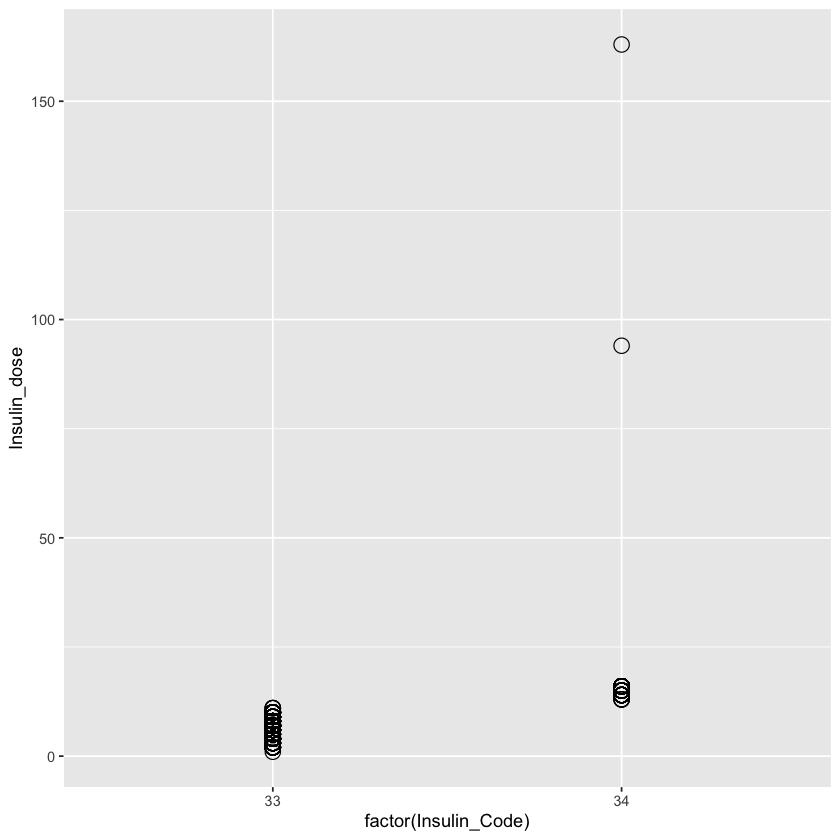

In [40]:
#Plot of Insulin type against Insulin dose
ggplot(Insulin_data, aes(factor(Insulin_Code), Insulin_dose)) + geom_point(shape = 1, size = 4)
#Showing 2 anomalous values for Intermediate Insulin - not compatible with life

In [42]:
#Locating the anomalous values identified above

anomalous_insulin <- Insulin_data %>%
    filter(Insulin_dose > 30)

anomalous_insulin


Insulin_Code,Insulin_dose,pid,date1,datetime
34,163,D1,1991-05-01,1991-05-01 17:23:00
34,94,D1,1991-05-28,1991-05-28 17:20:00


25% 75% 
  6  14

[1] 8

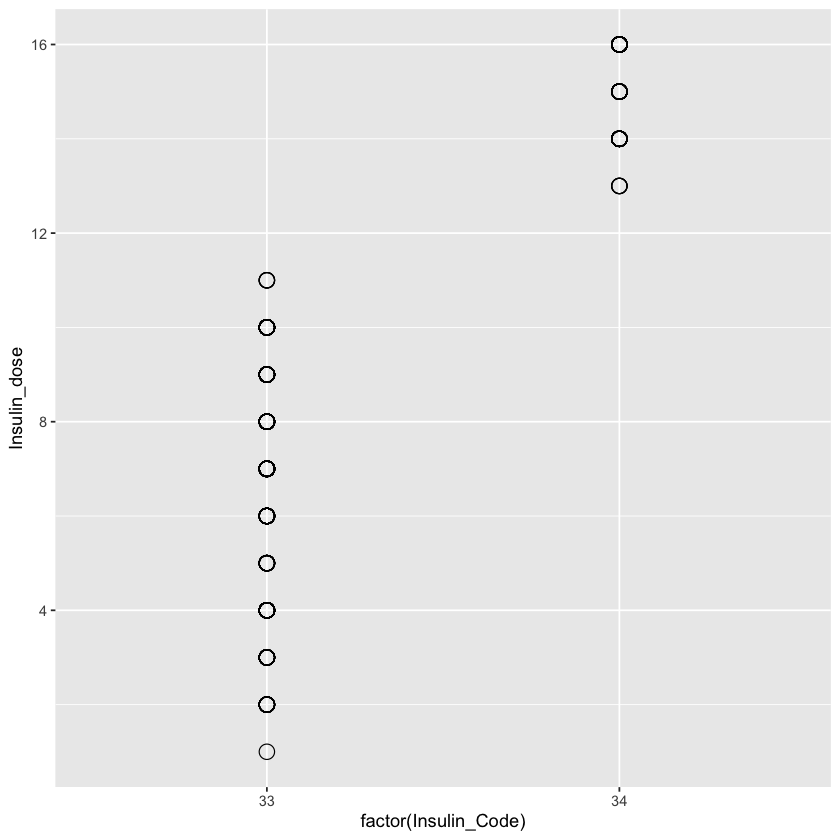

In [43]:
#Statistical method for locating and filtering out the outliers above 

#Quantile function used to find 25th and 75th percentiles of the Insulin doses
Q <- quantile(Insulin_data$Insulin_dose, probs = c(.25, .75), na.rm = FALSE)
Q

#Calculating IQR
iqr <- IQR(Insulin_data$Insulin_dose)
iqr

#Calculating cutoff ranges beyond which all data points are outliers
up <- Q[2] + 1.5 * iqr #upper range
low <- Q[1] + 1.5 * iqr #lower range

eliminated <- subset(Insulin_data, Insulin_data$Insulin_dose < (Q[2] + 1.5 * iqr))

#Plot to check for eliminated outliers
ggplot(eliminated, aes(factor(Insulin_Code), Insulin_dose)) + geom_point(shape = 1, size = 4)

In [44]:
#Repeating above for Glucose 

#Filtering out datasets for Blood Glucose Codes against Glucose Values

target2 <- c(48, 57, 58, 59, 60, 61, 62, 63, 64, 65)

Glucose_data <- D2_dates %>%
    filter(Code %in% target2) %>%
    rename(Glucose_Code = Code) %>%
    rename(Glucose_Value = Value)

head(Glucose_data)
nrow(Glucose_data)

Glucose_Code,Glucose_Value,pid,date1,datetime
58,100,D1,1991-04-21,1991-04-21 09:09:00
62,119,D1,1991-04-21,1991-04-21 17:08:00
48,123,D1,1991-04-21,1991-04-21 22:51:00
58,216,D1,1991-04-22,1991-04-22 07:35:00
62,211,D1,1991-04-22,1991-04-22 16:56:00
58,257,D1,1991-04-23,1991-04-23 07:25:00


[1] 420

In [45]:
#Filtering for excessively high/low blood glucose values

Glucose_extremes <- Glucose_data %>%
    filter(Glucose_Value <= 40 | Glucose_Value >= 200)

head(Glucose_extremes)
nrow(Glucose_extremes)

Glucose_Code,Glucose_Value,pid,date1,datetime
58,216,D1,1991-04-22,1991-04-22 07:35:00
62,211,D1,1991-04-22,1991-04-22 16:56:00
58,257,D1,1991-04-23,1991-04-23 07:25:00
58,239,D1,1991-04-24,1991-04-24 07:52:00
48,340,D1,1991-04-24,1991-04-24 22:09:00
62,206,D1,1991-04-25,1991-04-25 17:24:00


[1] 161

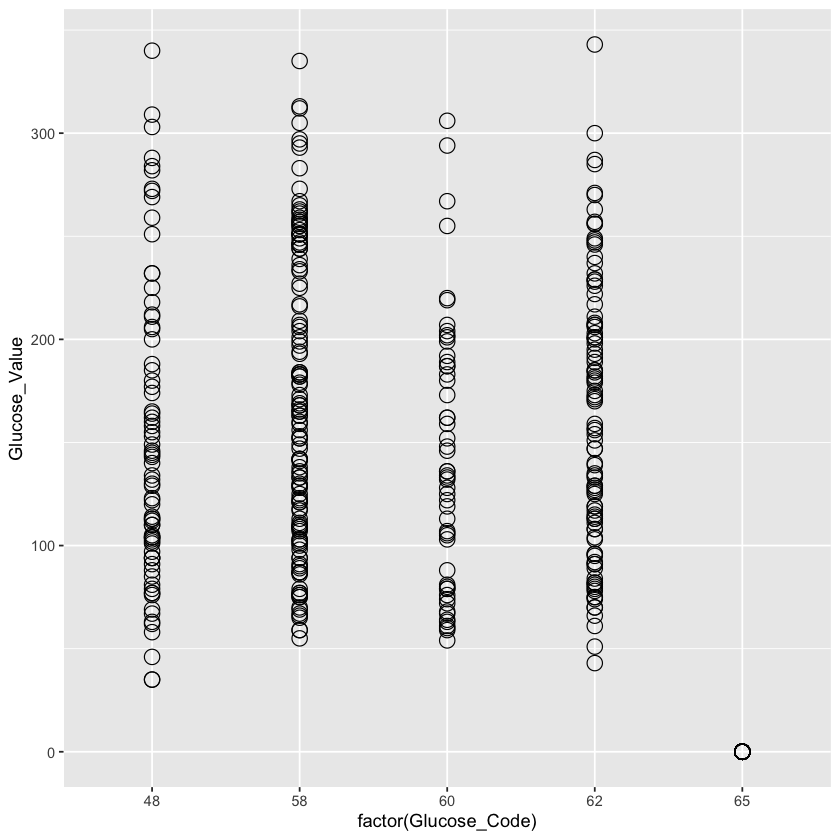

In [46]:
#Plot of Glucose type against Glucose value - revealing the specific glucose codes that contain datapoints (5 redundant glucose codes with no
#datasets)
ggplot(Glucose_data, aes(factor(Glucose_Code), Glucose_Value)) + geom_point(shape = 1, size = 4)

In [47]:
#Combining both tables for Insulin and Glucose values 

Diabetes_InsGlucose <- Insulin_data %>%
    inner_join(Glucose_data, by = c("date1", "pid", "datetime"))

head(Diabetes_InsGlucose)
nrow(Diabetes_InsGlucose)

Insulin_Code,Insulin_dose,pid,date1,datetime,Glucose_Code,Glucose_Value
33,9,D1,1991-04-21,1991-04-21 09:09:00,58,100
34,13,D1,1991-04-21,1991-04-21 09:09:00,58,100
33,7,D1,1991-04-21,1991-04-21 17:08:00,62,119
33,10,D1,1991-04-22,1991-04-22 07:35:00,58,216
34,13,D1,1991-04-22,1991-04-22 07:35:00,58,216
33,7,D1,1991-04-22,1991-04-22 16:56:00,62,211


[1] 430

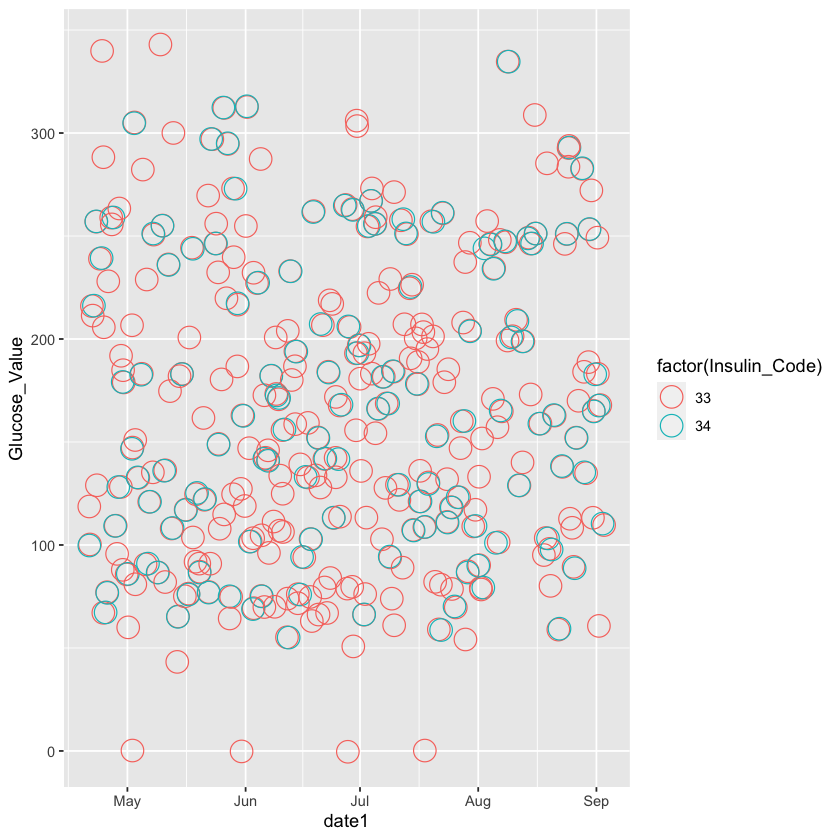

In [48]:
#Plot of blood glucose measurements against Insulin-type (Regular, Intermediate or Long-Acting Insulin)
ggplot(Diabetes_InsGlucose, aes(date1, Glucose_Value, colour = factor(Insulin_Code))) + geom_point(shape = 1, size = 6, position = "jitter")

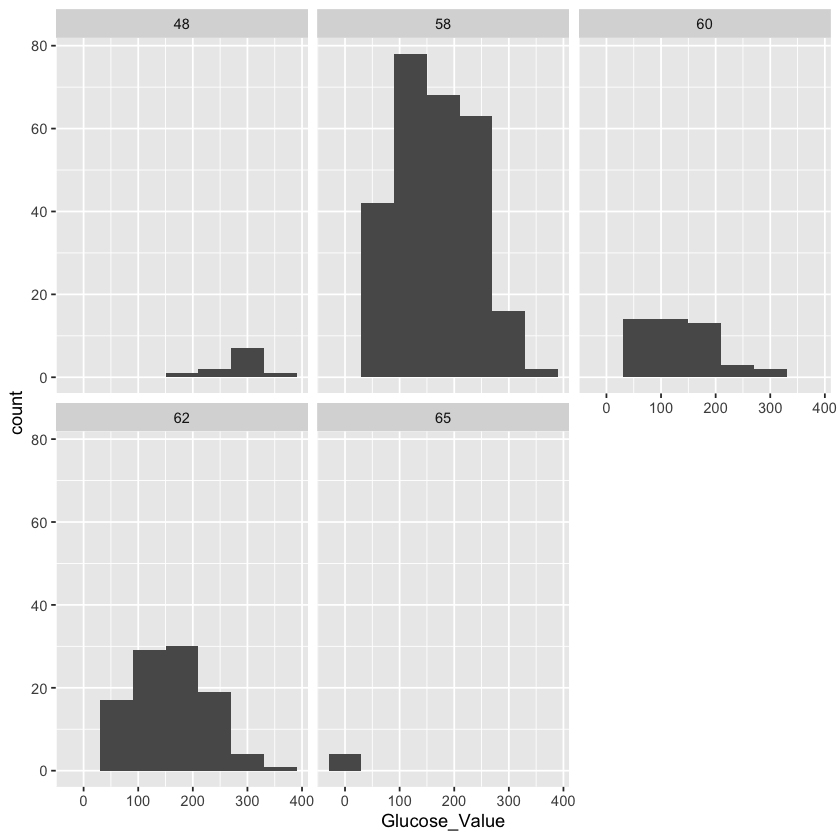

In [50]:
#Faceted histogram plot of Glucose values broken down by each Glucose code - showing distribution of Glucose values around each Glucose code
ggplot(Diabetes_InsGlucose, aes(x = Glucose_Value)) + geom_histogram(binwidth = 60) + facet_wrap(~Glucose_Code)

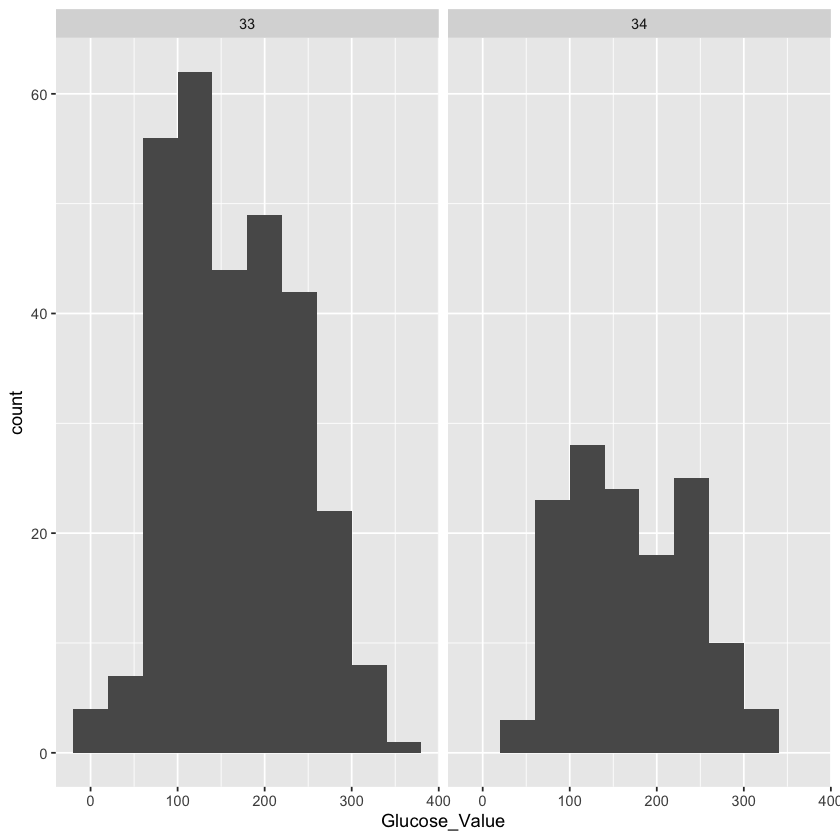

In [51]:
#Faceted dotplot graph of Glucose values broken down by Insulin Code 
ggplot(Diabetes_InsGlucose, aes(x = Glucose_Value)) + geom_histogram(binwidth = 40) + facet_wrap(~Insulin_Code)

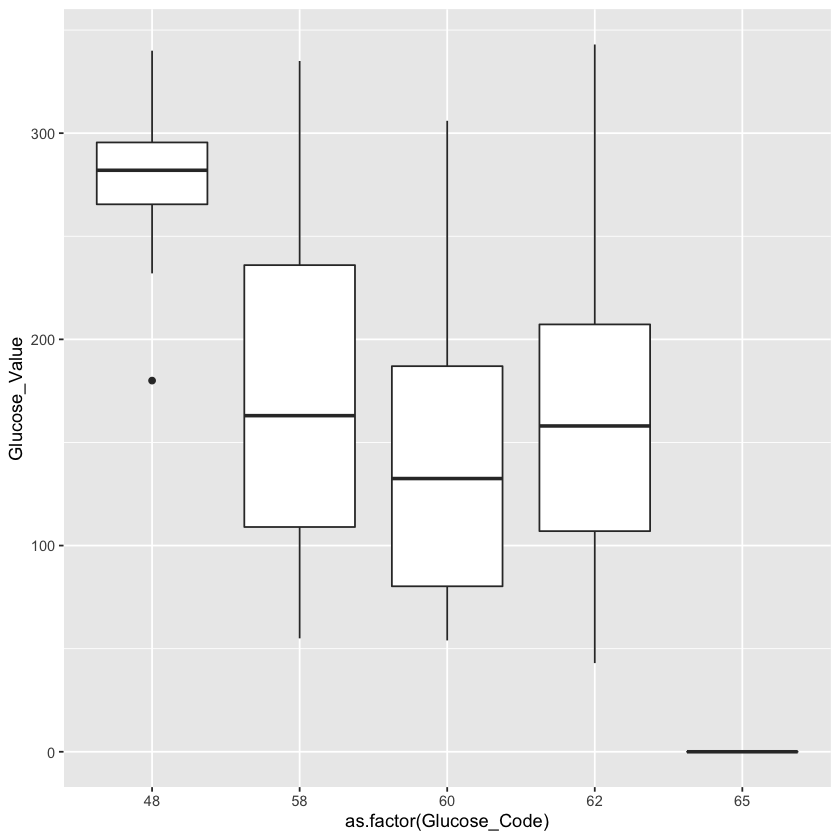

In [52]:
#Box-Plots showng distribution of Glucose values separated out by Glucose code
ggplot(Diabetes_InsGlucose, aes(x = as.factor(Glucose_Code), y = Glucose_Value)) + geom_boxplot()

#Output showing median Glucose value greatest for Code 58 (Pre-breakfast BM). wrt "Variability", again Code 58 has the widest box but 62
#No outliers present except for Code 48 (Unspecified Glucose readings, with quartiles close to 300g/dL (very high glucose values)
#The unspecified Glucose values (48) were likely taken immediately after meals
#Values of 0 logged for Hypoglycaemia code (65) (this is a more likely outcome than an actual BM reading of 0)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


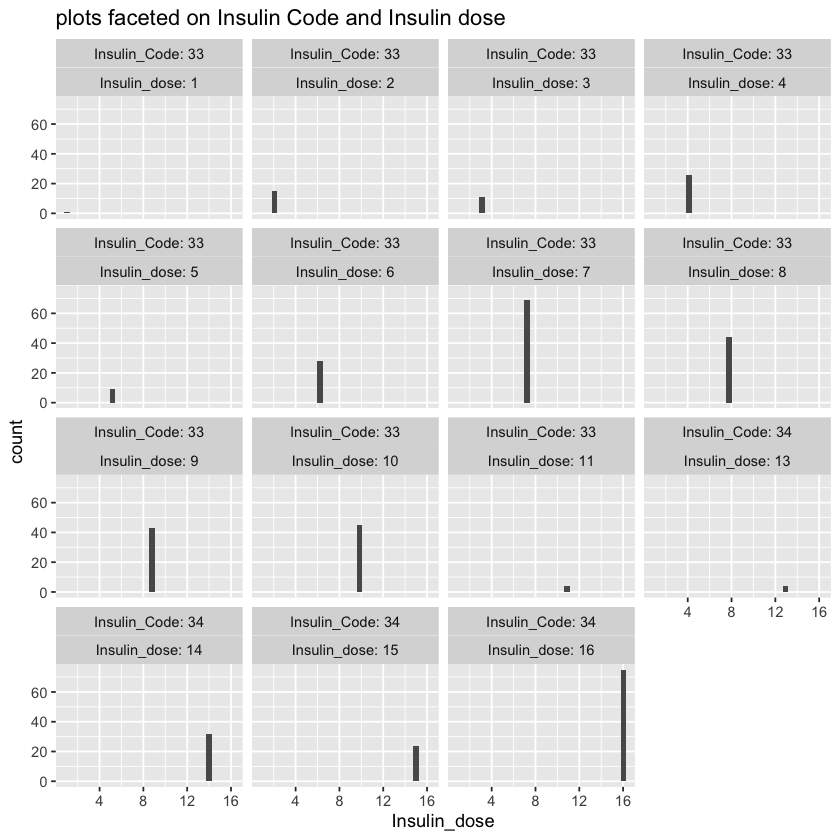

In [55]:
#Faceted plots of Insulin dose against Insulin code - showing doses of 8 and 7 units of 'Regular Insulin' were most frequently used by 
#patient 1 and a dose of 16 units of 'Intermediate Insulin' was most frequently used by patient 1
ggplot(Diabetes_InsGlucose, aes(Insulin_dose)) + geom_histogram() + facet_wrap(~Insulin_Code ~Insulin_dose, labeller = label_both) + 
                                                                               ggtitle("plots faceted on Insulin Code and Insulin dose")


In [56]:
# MEASUREMENT OF CENTRES OF SPREAD & GROUPWISE MEASURES OF DATA 

In [57]:
#Computing mean, median, sd, IQR of Glucose values by Insulin Code
Diabetes_InsGlucose %>%
    group_by(Insulin_Code) %>%
    summarise(mean(Glucose_Value),
             median(Glucose_Value),
             sd(Glucose_Value),
             IQR(Glucose_Value),
             n())

#similar mean and median glucose values for Regular and Intermediate Insulin use by patient 1

Insulin_Code,mean(Glucose_Value),median(Glucose_Value),sd(Glucose_Value),IQR(Glucose_Value),n()
33,163.7085,159,73.23773,115.0,295
34,169.7185,163,70.60164,128.5,135


In [58]:
#Computing above metrics again - for Glucose values by Glucose code
Diabetes_InsGlucose %>%
    group_by(Glucose_Code) %>%
    summarise(mean(Glucose_Value),
            median(Glucose_Value),
            sd(Glucose_Value),
            IQR(Glucose_Value),
            n())

#Mean and median blood glucose levels were highest for this patient within the "Unspecified blood glucose measurements" group (Glucose Code = 48)

Glucose_Code,mean(Glucose_Value),median(Glucose_Value),sd(Glucose_Value),IQR(Glucose_Value),n()
48,274.7273,282.0,41.95972,30.00,11
58,169.4424,163.0,70.45514,127.00,269
60,139.4130,132.5,63.28264,106.75,46
62,161.9100,158.0,66.85656,100.25,100
65,0.0000,0.0,0.00000,0.00,4


In [59]:
# INFERENTIAL COHORT ANALYSIS

In [61]:
# Creating features to "bucket" datetimes in patient dataset 1 into specific months
Diabetes_InsGlucose_dateGroups <- Diabetes_InsGlucose %>%
    mutate(time_period = case_when(datetime >= '1991-04-21' & datetime <= '1991-05-19' ~ "month_1",
                                  datetime >= '1991-05-20' & datetime <= '1991-06-16' ~ "month_2",
                                  datetime >= '1991-06-17' & datetime <= '1991-07-14' ~ "month_3",
                                  datetime >= '1991-07-15' & datetime <= '1991-08-11' ~ "month_4",
                                  datetime >= '1991-08-12' & datetime <= '1991-09-01' ~ "month_5"))

head(Diabetes_InsGlucose_dateGroups)
nrow(Diabetes_InsGlucose_dateGroups)

Insulin_Code,Insulin_dose,pid,date1,datetime,Glucose_Code,Glucose_Value,time_period
33,9,D1,1991-04-21,1991-04-21 09:09:00,58,100,month_1
34,13,D1,1991-04-21,1991-04-21 09:09:00,58,100,month_1
33,7,D1,1991-04-21,1991-04-21 17:08:00,62,119,month_1
33,10,D1,1991-04-22,1991-04-22 07:35:00,58,216,month_1
34,13,D1,1991-04-22,1991-04-22 07:35:00,58,216,month_1
33,7,D1,1991-04-22,1991-04-22 16:56:00,62,211,month_1


[1] 430

In [128]:
#Conversion of month "buckets" to numeric
Diabetes_InsGlucose_months <- Diabetes_InsGlucose_dateGroups %>%
    mutate(
            month_1 = ifelse(time_period == "month_1", 1, 0),
            month_2 = ifelse(time_period == "month_2", 1, 0),
            month_3 = ifelse(time_period == "month_3", 1, 0),
            month_4 = ifelse(time_period == "month_4", 1, 0),
            month_5 = ifelse(time_period == "month_5", 1,0))

head(Diabetes_InsGlucose_months)

Insulin_Code,Insulin_dose,pid,date1,datetime,Glucose_Code,Glucose_Value,time_period,month_1,month_2,month_3,month_4,month_5
33,9,D1,1991-04-21,1991-04-21 09:09:00,58,100,month_1,1,0,0,0,0
34,13,D1,1991-04-21,1991-04-21 09:09:00,58,100,month_1,1,0,0,0,0
33,7,D1,1991-04-21,1991-04-21 17:08:00,62,119,month_1,1,0,0,0,0
33,10,D1,1991-04-22,1991-04-22 07:35:00,58,216,month_1,1,0,0,0,0
34,13,D1,1991-04-22,1991-04-22 07:35:00,58,216,month_1,1,0,0,0,0
33,7,D1,1991-04-22,1991-04-22 16:56:00,62,211,month_1,1,0,0,0,0


In [103]:
#One hot encode the "buckets" of month, Insulin Code & Glucose Code categories to numeric

Diabetes_InsGlucose_buckets <- Diabetes_InsGlucose_dateGroups %>%
    mutate(
        month_1 = ifelse(time_period == "month_1", 1, 0),
        month_2 = ifelse(time_period == "month_2", 1, 0),
        month_3 = ifelse(time_period == "month_3", 1, 0),
        month_4 = ifelse(time_period == "month_4", 1, 0),
        month_5 = ifelse(time_period == "month_5", 1, 0),
        Reg_Insulin = ifelse(Insulin_Code == '33', 1, 0),
        Inter_Insulin = ifelse(Insulin_Code == '34', 1, 0),
        LongAct_Insulin = ifelse(Insulin_Code == '35', 1, 0),
        Unspec_Gluc = ifelse(Glucose_Code == '48', 1, 0),
        PreBreak_Gluc = ifelse(Glucose_Code == '58', 1, 0),
        PreLun_Gluc = ifelse(Glucose_Code == '60', 1, 0),
        PreSup_Gluc = ifelse(Glucose_Code == '62', 1, 0),
        Hypoglycaemia = ifelse(Glucose_Code == '65', 1, 0))

head(Diabetes_InsGlucose_buckets)
glimpse(Diabetes_InsGlucose_buckets)

Insulin_Code,Insulin_dose,pid,date1,datetime,Glucose_Code,Glucose_Value,time_period,month_1,month_2,...,month_4,month_5,Reg_Insulin,Inter_Insulin,LongAct_Insulin,Unspec_Gluc,PreBreak_Gluc,PreLun_Gluc,PreSup_Gluc,Hypoglycaemia
33,9,D1,1991-04-21,1991-04-21 09:09:00,58,100,month_1,1,0,...,0,0,1,0,0,0,1,0,0,0
34,13,D1,1991-04-21,1991-04-21 09:09:00,58,100,month_1,1,0,...,0,0,0,1,0,0,1,0,0,0
33,7,D1,1991-04-21,1991-04-21 17:08:00,62,119,month_1,1,0,...,0,0,1,0,0,0,0,0,1,0
33,10,D1,1991-04-22,1991-04-22 07:35:00,58,216,month_1,1,0,...,0,0,1,0,0,0,1,0,0,0
34,13,D1,1991-04-22,1991-04-22 07:35:00,58,216,month_1,1,0,...,0,0,0,1,0,0,1,0,0,0
33,7,D1,1991-04-22,1991-04-22 16:56:00,62,211,month_1,1,0,...,0,0,1,0,0,0,0,0,1,0


Rows: 430
Columns: 21
$ Insulin_Code    <int> 33, 34, 33, 33, 34, 33, 33, 34, 33, 33, 34, 33, 33, 34~
$ Insulin_dose    <int> 9, 13, 7, 10, 13, 7, 11, 13, 7, 10, 14, 5, 9, 14, 7, 2~
$ pid             <chr> "D1", "D1", "D1", "D1", "D1", "D1", "D1", "D1", "D1", ~
$ date1           <date> 1991-04-21, 1991-04-21, 1991-04-21, 1991-04-22, 1991-~
$ datetime        <dttm> 1991-04-21 09:09:00, 1991-04-21 09:09:00, 1991-04-21 ~
$ Glucose_Code    <int> 58, 58, 62, 58, 58, 62, 58, 58, 62, 58, 58, 48, 58, 58~
$ Glucose_Value   <int> 100, 100, 119, 216, 216, 211, 257, 257, 129, 239, 239,~
$ time_period     <chr> "month_1", "month_1", "month_1", "month_1", "month_1",~
$ month_1         <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ~
$ month_2         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ month_3         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ month_4         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ month_5         

In [104]:
#Include column for time of day

Diabetes_InsGlucose_buckets2 <- Diabetes_InsGlucose_buckets %>%
    mutate(hod = hour(datetime))

glimpse(Diabetes_InsGlucose_buckets2)

Rows: 430
Columns: 22
$ Insulin_Code    <int> 33, 34, 33, 33, 34, 33, 33, 34, 33, 33, 34, 33, 33, 34~
$ Insulin_dose    <int> 9, 13, 7, 10, 13, 7, 11, 13, 7, 10, 14, 5, 9, 14, 7, 2~
$ pid             <chr> "D1", "D1", "D1", "D1", "D1", "D1", "D1", "D1", "D1", ~
$ date1           <date> 1991-04-21, 1991-04-21, 1991-04-21, 1991-04-22, 1991-~
$ datetime        <dttm> 1991-04-21 09:09:00, 1991-04-21 09:09:00, 1991-04-21 ~
$ Glucose_Code    <int> 58, 58, 62, 58, 58, 62, 58, 58, 62, 58, 58, 48, 58, 58~
$ Glucose_Value   <int> 100, 100, 119, 216, 216, 211, 257, 257, 129, 239, 239,~
$ time_period     <chr> "month_1", "month_1", "month_1", "month_1", "month_1",~
$ month_1         <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ~
$ month_2         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ month_3         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ month_4         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ month_5         

In [105]:
# "Bucket" hour of day column into specific periods of day

Diabetes_InsGlucose_buckets3 <- Diabetes_InsGlucose_buckets2 %>%
    mutate(time_day = case_when(hod >= 6 & hod < 12 ~ "morning",
                               hod >= 12 & hod < 18 ~ "afternoon",
                               hod >= 18 & hod < 24 ~ "evening",
                               hod >= 0 & hod < 6 ~ "nighttime"))

glimpse(Diabetes_InsGlucose_buckets3)


Rows: 430
Columns: 23
$ Insulin_Code    <int> 33, 34, 33, 33, 34, 33, 33, 34, 33, 33, 34, 33, 33, 34~
$ Insulin_dose    <int> 9, 13, 7, 10, 13, 7, 11, 13, 7, 10, 14, 5, 9, 14, 7, 2~
$ pid             <chr> "D1", "D1", "D1", "D1", "D1", "D1", "D1", "D1", "D1", ~
$ date1           <date> 1991-04-21, 1991-04-21, 1991-04-21, 1991-04-22, 1991-~
$ datetime        <dttm> 1991-04-21 09:09:00, 1991-04-21 09:09:00, 1991-04-21 ~
$ Glucose_Code    <int> 58, 58, 62, 58, 58, 62, 58, 58, 62, 58, 58, 48, 58, 58~
$ Glucose_Value   <int> 100, 100, 119, 216, 216, 211, 257, 257, 129, 239, 239,~
$ time_period     <chr> "month_1", "month_1", "month_1", "month_1", "month_1",~
$ month_1         <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ~
$ month_2         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ month_3         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ month_4         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ month_5         

In [110]:
#One hot encode the "time of day" column

Diabetes_InsGlucose_buckets4 <- Diabetes_InsGlucose_buckets3 %>%
    mutate(
            morn = ifelse(time_day == "morning", 1, 0),
            aft_noon = ifelse(time_day == "afternoon", 1, 0),
            evening = ifelse(time_day == "evening", 1, 0),
            night = ifelse(time_day == "nighttime", 1, 0))

glimpse(Diabetes_InsGlucose_buckets4)

Rows: 430
Columns: 27
$ Insulin_Code    <int> 33, 34, 33, 33, 34, 33, 33, 34, 33, 33, 34, 33, 33, 34~
$ Insulin_dose    <int> 9, 13, 7, 10, 13, 7, 11, 13, 7, 10, 14, 5, 9, 14, 7, 2~
$ pid             <chr> "D1", "D1", "D1", "D1", "D1", "D1", "D1", "D1", "D1", ~
$ date1           <date> 1991-04-21, 1991-04-21, 1991-04-21, 1991-04-22, 1991-~
$ datetime        <dttm> 1991-04-21 09:09:00, 1991-04-21 09:09:00, 1991-04-21 ~
$ Glucose_Code    <int> 58, 58, 62, 58, 58, 62, 58, 58, 62, 58, 58, 48, 58, 58~
$ Glucose_Value   <int> 100, 100, 119, 216, 216, 211, 257, 257, 129, 239, 239,~
$ time_period     <chr> "month_1", "month_1", "month_1", "month_1", "month_1",~
$ month_1         <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ~
$ month_2         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ month_3         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ month_4         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ month_5         

In [106]:
#Frequency of use of Regular Insulin
Diabetes_InsGlucose_buckets3 %>%
    summarise(total = n(), percent_yes = mean(Reg_Insulin == 1))

total,percent_yes
430,0.6860465


In [107]:
#Frequency of use of Intermediate Insulin
Diabetes_InsGlucose_buckets3 %>%
    summarise(total = n(), percent_yes = mean(Inter_Insulin == 1))

total,percent_yes
430,0.3139535


In [109]:
#Frequency of use of Long-Acting Insulin
Diabetes_InsGlucose_buckets3 %>%
    summarise(total = n(), percent_yes = mean(LongAct_Insulin == 1))

total,percent_yes
430,0


In [112]:
#Frequency of use of Regular Insulin in the morning
Diabetes_InsGlucose_buckets4 %>%
    group_by(morn) %>%
    summarise(total = n(), percent_yes = mean(Reg_Insulin == 1))

morn,total,percent_yes
0,162,0.9876543
1,268,0.5037313


In [113]:
#Frequency of use of Regular Insulin in the afternoon
Diabetes_InsGlucose_buckets4 %>%
    group_by(aft_noon) %>%
    summarise(total = n(), percent_yes = mean(Reg_Insulin == 1))

aft_noon,total,percent_yes
0,294,0.5408163
1,136,1.0000000


In [114]:
#Frequency of use of Regular Insulin in the evening
Diabetes_InsGlucose_buckets4 %>%
    group_by(evening) %>%
    summarise(total = n(), percent_yes = mean(Reg_Insulin == 1))

evening,total,percent_yes
0,408,0.6691176
1,22,1.0000000


In [116]:
#Frequency of use of Regular Insulin in the nightime
Diabetes_InsGlucose_buckets4 %>%
    group_by(night) %>%
    summarise(total = n(), percent_yes = mean(Reg_Insulin == 1))

night,total,percent_yes
0,426,0.6877934
1,4,0.5000000


In [117]:
# ANOMALY DETECTION 

In [119]:
#Summary statistics
summary(Diabetes_InsGlucose$Glucose_Value)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   107.0   159.5   165.6   226.8   343.0 

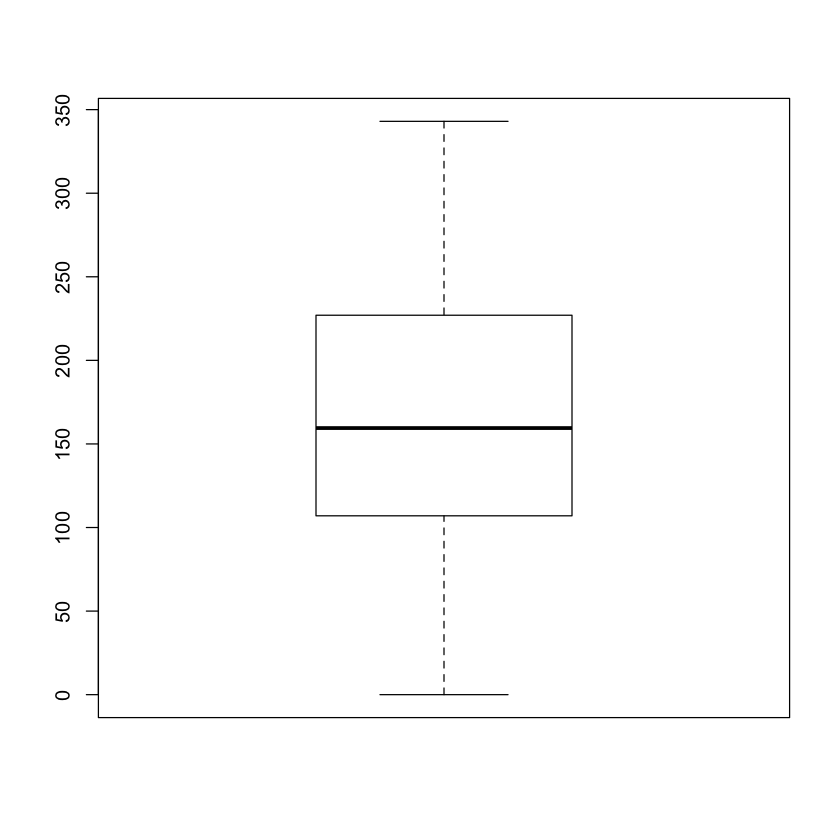

In [120]:
#Plot distribution of Glucose concentration 
boxplot(Diabetes_InsGlucose$Glucose_Value)

#no visual outliers detected in the Glucose concentration data

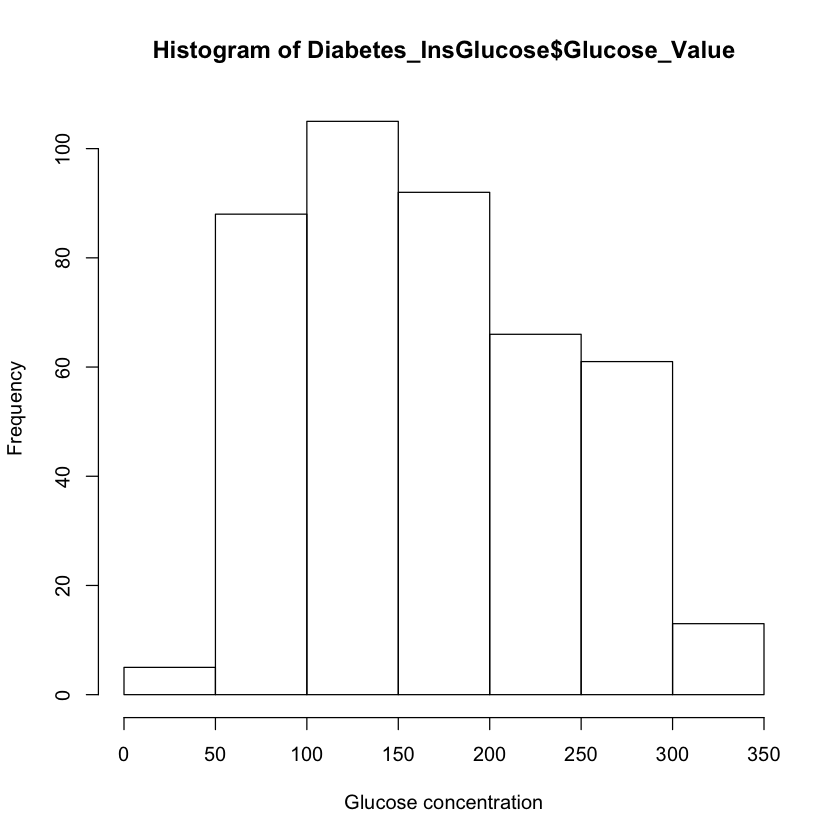

In [121]:
#GRUBBS' TEST - check if point farthest from mean is potential outlier. Normal data distribution required. 
#Check symmetry and shape of histogram for this

hist(Diabetes_InsGlucose$Glucose_Value, breaks = 6, xlab = "Glucose concentration")

#histogram shows an approximaely symmetrical and bell shaped data, therefore Grubbs' test to be used here

In [124]:
#Perform Grubbs' test for single outlier
grubbs.test(Diabetes_InsGlucose$Glucose_Value)

#datapoint tested here was Glucose concentration of 343 and the p-value associated with it = 1. This suggests the evidence is WEAK that this 
#point IS an outlier. Highly likely this point is NOT an outlier.


	Grubbs test for one outlier

data:  Diabetes_InsGlucose$Glucose_Value
G = 2.45061, U = 0.98597, p-value = 1
alternative hypothesis: highest value 343 is an outlier


In [127]:
#Grubbs' test for multiple outliers
which.max(Diabetes_InsGlucose$Glucose_Value)
#the highest value outlier identified (343) is on row 62

#Run Grubbs' test excluding row 62
grubbs.test(Diabetes_InsGlucose$Glucose_Value[-62])
#Second "outlier" identified i.e. 340 has p-value of 1, again suggesting this is also likely NOT to be an outlier

#Print value tested in second Grubbs' test
max(Diabetes_InsGlucose$Glucose_Value[-62])

[1] 62


	Grubbs test for one outlier

data:  Diabetes_InsGlucose$Glucose_Value[-62]
G = 2.42916, U = 0.98618, p-value = 1
alternative hypothesis: highest value 340 is an outlier


[1] 340